11 Cryptographie


Depuis le code de César, les méthodes cryptographiques permettant de transmettre des messages secrets ont évoluées en suivant les progrès permettant de les casser. La méthode Vigenère qui est une amélioration du code de César sera étudiée, et nous verrons comment il est possible de casser cette méthode de chiffrement. Ensuite, la méthode de chiffrement RSA qui est une des méthodes de cryptographie asymétrique les plus utilisées actuellement sera introduite.

**Concepts abordés:**

* code Vigenère

* plus grand diviseur commun

* importation de texte

* nombre premier et pseudo-premier

* petit théorème de Fermat

* algorithme d'Euclide

* algorithme de Miller-Rabin

* optimisation par décorateur

* chiffrement asymétrique RSA

1. Code de Vigenère

   Le code de Vigenère consiste à choisir une clef formée par un mot secret (en majuscules) et à le transformer en un vecteur dont les éléments sont les positions de ces lettres dans l'alphabet. Par exemple, «ASECRET» correspond à (0, 18, 4, 2, 17, 4, 19). Pour coder un texte (en majuscules, sans espace ni ponctuation) avec la clef «ASECRET» il suffit de décaler la première lettre par 0, la deuxième par 18, la troisième par 4, et ainsi de suite et de recommencer en boucle. Les détails en particulier historiques sont disponibles sur [Wikipédia](https://fr.wikipedia.org/wiki/Chiffre_de_Vigenère).

a)
Écrivons une fonction `to_int(s)` qui transforme un caractère en sa place dans l'alphabet et écrire la fonction inverse `to_chr(i)`. Après quelques tests, les caractères A à Z sont codés de 65 à 90 par la fonction ord(). Il suffit de retrancher par 65 pour la première fonction.

In [1]:
import numpy as np

def to_int(s):
    return ord(s)-65

print(to_int('I'))

def to_chr(i):
    return chr(i+65)

print(to_chr(0))

8
A


b)Écrivons une fonction `crypt(text, key)` qui chiffre `text` avec le mot secret `key`.

In [2]:
def crypt(texte, key):
    chaine=''
    n=len(key)
    i=0
    for s in texte:
        if s==' ':
            chaine+=' '
        else:
            chaine+=to_chr((to_int(s)+to_int(key[i]))%26)
            i=(i+1)%n
    return chaine

T=crypt('SARAH CONNOR', 'OK')
print(T)

GKFKV MCXBYF


c) 
Écrivons une fonction permettant de déchiffrer un texte en connaissant la clef. C'est en fait la même focntion qu'avant mais on met un moins avant le to_int(key[i])

In [3]:
def decrypt(texte, key):
    chaine=''
    n=len(key)
    i=0
    for s in texte:
        if s==' ':
            chaine+=' '
        else:
            chaine+=to_chr((to_int(s)-to_int(key[i]))%26)
            i=(i+1)%n
    return chaine

decrypt(T, 'OK')

'SARAH CONNOR'

2. Casser le code de Vigenère

Charles Babbage a été le premier à casser le code de Vigenère. L'idée est que trois lettres consécutives apparaissant plusieurs fois dans le texte chiffré ont toutes les chances d'être la conséquence du chiffrement des mêmes lettres du message avec les mêmes lettres de la clef. Cela est encore plus probable avec un groupe de quatre lettres. Ainsi l'espacement entre deux mêmes groupes de lettres chiffrées est un multiple de la longueur de la clef. Par exemple, si la répétition d'un groupe est espacée de 28 lettres, puis celle d'un autre de 91, le plus grand diviseur commun de 28 et 91 est 7. Ainsi il est probable que la clef possède 7 lettres. Ensuite connaissant la taille de la clef, il suffit de se baser sur le fait que la lettre «E» est la plus courante en français. Pour que cette stratégie ait une chance de réussir, il faut que la taille du texte soit assez importante.



a)
Écrivons une fonction permettant de calculer le plus grand diviseur commun (PGCD) entre deux nombre. Puis une autre fonction permettant de calculer le PGCD entre une liste de nombres. En récursif c'est plus simple à écrire pour la première:

In [6]:
def pgcd(a, b):
    if a%b==0:
        return b
    else:
        return pgcd(b, a%b)
print(pgcd(24, 45))

def pgcd_(liste):
    n=len(liste)
    res=pgcd(liste[0], liste[1])
    for i in range(2, n):
        res=pgcd(res, liste[i])
    return res
print(pgcd_([15, 60, 45]))

3
15


b)J'ai récupéré un extrait des Rivages des Syrtes de Julien Gracq, puis j'ai écris une fonction qui convertis le texte en majuscules et le débarrasse de toute la ponctuation et autres caractères spéciaux.

In [4]:
with open("Syrtes.txt", "r") as extrait:
        Fsource=extrait.read()
extrait.close()

import unicodedata, re
def convert_upper(text):
    # convertir en majuscules
    text = text.upper()
    # convertir les accents
    text = unicodedata.normalize('NFKD', text)
    # supprimer les caractères spéciaux
    regex = re.compile('[^a-zA-Z]')
    text = regex.sub('', text)
    return text

Fsource=convert_upper(Fsource)
print(Fsource)

TUSAISCESNUITSDETEQUISONTPLUSCHAUDESQUELEJOUROUONDIRAITQUELESSYRTESMACERENTCOMMEUNCORPSDANSSASUEURJEMELEVAISPIEDSNUSSURLESDALLESFRAICHESDANSCEPEIGNOIRBLANCQUETUAIMESELLESETOURNAVERSMOIAVECUNELUEURDEPROVOCATIONDANSLESYEUXJETAITROMPESOUVENTALDOCETAITUNRENDEZVOUSDAMOURACETTEHEURELAMAREMMAESTCOMMEMORTECENESTPASUNEVILLEQUIDORTCESTUNEVILLEDONTLECOEURACESSEDEBATTREUNEVILLESACCAGEEETSIONREGARDEPARLABAIELALAGUNEESTCOMMEUNECROUTEDESELETONCROITVOIRUNEMERDELALUNEONDIRAITQUELAPLANETESESTREFROIDIEPENDANTQUONDORMAITQUONSESTLEVEAUCOEURDUNENUITDAUDELADESAGESONCROITVOIRCEQUISERAUNJOURCONTINUATELLEDANSUNEEXALTATIONILLUMINEEQUANDILNYAURAPLUSDEMAREMMAPLUSDORSENNAPLUSMEMELEURSRUINESPLUSRIENQUELALAGUNEETLESABLEETLEVENTDUDESERTSOUSLESETOILESONDIRAITQUONATRAVERSELESSIECLESTOUTSEULETQUONRESPIREPLUSLARGEMENTPLUSSOLENNELLEMENTDECEQUESESONTETEINTESDESMILLIONSDHALEINESPOURRIESILNYAJAMAISEUDENUITSALDOOUTUASREVEQUELATERRETOURNAITSOUDAINPOURTOITOUTSEULTOURNAITPLUSVITEETQUEDANSCETTECOURSEENRAGEETULAISSAISSURPLACELESBET

c)
Gardons environ un milier de caractères au milieu du texte choisi et chiffrons- le avec une clef. Écrivons ensuite une fonction permettant de déterminer la longueur de la clef en regardant dans le message chiffré les chaînes identiques de trois caractères ou plus. J'ai gardé seulement les distances de triplets qui apparaissent au moins 3 fois dans le message chiffré. On trouve bien un pgcd de 5 avec la clé "GRACQ"

In [7]:
base = Fsource[200: 1200]
message= crypt(base, 'GRACQ')
print(message)

dict={}
n=len(message)
for i in range(0, n-2):
    if message[i:(i+3)] not in dict:
        dict[message[i:(i+3)]]=[i]
    else:
        dict[message[i:(i+3)]].append(i)
occ=3
distances=[]
for x in dict:
    j=len(dict[x])
    if j>occ:
        for k in range(0,j-1):
            distances.append(dict[x][k+1]-dict[x][k])
print(distances)
pgcd_(distances)            

UMOEQZZOPTGESNUYPEWNPVTCYZIOOFKJOWLKETCBJFCGJGZTWDXVNFUFMOWIJRMQKXRCGJZVHGKXVLCCGIEOCGVSVSUDMGCUITGSKEEUJVRSWDKMINBKHUKTUITEUYKUPUBZLNUJFNVBKTOGKXRCGIYVDGRGKTTUAEEXYRCEUQITAIUKVTUYUERGWGIDGFGILCRGZENQRRGWDKVSVSUDMGKTVCTEAKEFUYVLGJUECTEOKVQYXLNGCKIDGBGCUPUUEDKHGZTSKKCARBGEEVUYVSVHKWRQYJZERUTUAPJWLOPTUIMCYZHUQDYVSVBKMECKIFEWHJLNGDAZTFQAUENQJVSCWKJOPSXFIVLUZREUWLIUUXRUPZULREETKIPKGKENBKUAPIAEEGNGCTCJOFNKBRLMKDKVQWQTUINDERUTQVCUUTKDATUSDARBAJDQHYVNPQVCUUCKDENUAISTKOEEUFRLSTYKEQWURRLCWAEEGJRVSCRRVEVBKMEPJJLDGIKITUEAJLGIKKOKBKJOPTOIAKJWLOPQZIAXUXJENUYJIGSRVSVEAKSGKRVTSKUERGIVZRGFRLSNQXXEOUTKPNKYJONUTEENBKDEPJJVCGGAVSGIUETGJKZNVUYUEUCOCLKETJDJQRVIPUYGOWHXZEUYREYCZGDAKIKLDGDAZTUQRUOQKZLAUHKMESKKCAVUXIEVEAINCYZJOWTGZNREAITQYZFUVIKLLVEAINCYZGLWIBZTGUZHUGTGESEUZKEEEAISGUTIAIUKKUNQOJSCYYJUTFRRCGBKJBGJKJAWNVFUOETJPNKYWAKRRVSEUYFNVBKJBGJKJQWYTRIOUTKPCIRRVGDOIMCYYTENKOHUKIKETSKOCEUJKELWYAECQUAIPQKXTEVJKMIVUYJEKHXVSRYXRBNUIVQWYKJTEHODEGJVVRFYZZOPQYVSAUAOEVQYFNKDYKIPSZTEUJIVQWYRVMRUIYEFUHFNFYXVTTYKEDCK

5

d) Maintenant, 
Écrivons une fonction permettant de décrypter un message chiffré en retournant la clef. Essayer de décrypter le texte avec cette fonction.

Note : 
Pour trouver la première lettre de la clef, il faut calculer le nombre d'occurrences des 26 lettres de l'alphabet dans le message chiffré qui ont été chiffrées avec le premier caractère de la clef. En principe, la lettre dont l'occurrence est maximale correspond à la lettre «E». Il suffit ensuite de faire la même chose pour trouver les autres lettres de la clef.

In [8]:
lgKey=5
occurences={to_chr(i):0 for i in range(26)}
for i in range(int(len(message)/lgKey)):
    occurences[message[lgKey*i]]+=1
print(occurences)

{'A': 19, 'B': 2, 'C': 0, 'D': 0, 'E': 1, 'F': 1, 'G': 16, 'H': 1, 'I': 5, 'J': 8, 'K': 38, 'L': 0, 'M': 0, 'N': 0, 'O': 10, 'P': 1, 'Q': 0, 'R': 17, 'S': 1, 'T': 11, 'U': 13, 'V': 6, 'W': 3, 'X': 15, 'Y': 19, 'Z': 13}


On observe toutes les lettres du message chiffré qui ont été décalé par la première lettre de la clé : il est probable que la lettre qui revient le plus était la lettre E avant de se faire décaler par la première lettre de la clé. Ici donc il est probable que la lettre K soit la lettre E dans le message d'origine, et donc que la première lettre de la clé soit K(10)-E(4)=6 c'est à dire la lettre en position 6 dans l'alphabet (on commence à 0) c'est a dire G.
On recommence avec les lettres du message chiffré qui ont été décalé par la deuxieme lettre de la clé :

In [9]:
lgKey=5
occurences={to_chr(i):0 for i in range(26)}
for i in range(int(len(message)/lgKey)):
    occurences[message[lgKey*i+1]]+=1
print(occurences)

{'A': 0, 'B': 0, 'C': 9, 'D': 8, 'E': 21, 'F': 10, 'G': 2, 'H': 4, 'I': 20, 'J': 19, 'K': 13, 'L': 13, 'M': 7, 'N': 0, 'O': 1, 'P': 1, 'Q': 0, 'R': 12, 'S': 0, 'T': 5, 'U': 6, 'V': 30, 'W': 2, 'X': 1, 'Y': 1, 'Z': 15}


Ici c'est le V qui est le plus fréquent, donc il est probable que la deuxième lettre de la clé soit V(21)-E(5)+1=17 soit R. Automatisons ce processus dans un programme:
(la variable r permet de ne garder les distances de triplets qui apparaissent au moins r fois dans le message chiffré)

In [16]:
def findKey(message, r):
    dict={}
    n=len(message)
    for i in range(0, n-2):
        if message[i:(i+3)] not in dict:
            dict[message[i:(i+3)]]=[i]
        else:
            dict[message[i:(i+3)]].append(i)
    distances=[]
    for x in dict:
        j=len(dict[x])
        if j>r:
            for k in range(0,j-1):
                distances.append(dict[x][k+1]-dict[x][k])
    lgKey=pgcd_(distances)
    Key=''
    for k in range(lgKey):
        occurences={to_chr(i):0 for i in range(26)}
        for i in range(int(len(message)/lgKey)):
            occurences[message[lgKey*i+k]]+=1
        max = None
        lettreMax= None
        for x in occurences:
            if occurences[x]>0:
                if max is None or occurences[x] > max:
                    max = occurences[x]
                    lettreMax= x
        Key+=(to_chr(to_int(lettreMax)-4))
    return Key

findKey(message, 3)

'GRACQ'

Essayons avec ce même texte mais en prenant une clé au hasard, par exemple un mot du texte que je ne connais pas à l'avance : je choisi deux nombres au hasard, L le premier qui sera la longueur de la clé et I le deuxième la position de première lettre du mot clé dans le texte.

In [17]:
L=np.random.choice([1, 2, 3, 4, 5, 6, 7, 8])
I=np.random.choice([i for i in range(len(Fsource)-10)])
Randkey=message[I:I+L]
print("Texte d'origine: ")
print(base)
message2= crypt(base, Randkey)
print("Message chiffré: ")
print(message2)

Texte d'origine: 
OVOCATIONDANSLESYEUXJETAITROMPESOUVENTALDOCETAITUNRENDEZVOUSDAMOURACETTEHEURELAMAREMMAESTCOMMEMORTECENESTPASUNEVILLEQUIDORTCESTUNEVILLEDONTLECOEURACESSEDEBATTREUNEVILLESACCAGEEETSIONREGARDEPARLABAIELALAGUNEESTCOMMEUNECROUTEDESELETONCROITVOIRUNEMERDELALUNEONDIRAITQUELAPLANETESESTREFROIDIEPENDANTQUONDORMAITQUONSESTLEVEAUCOEURDUNENUITDAUDELADESAGESONCROITVOIRCEQUISERAUNJOURCONTINUATELLEDANSUNEEXALTATIONILLUMINEEQUANDILNYAURAPLUSDEMAREMMAPLUSDORSENNAPLUSMEMELEURSRUINESPLUSRIENQUELALAGUNEETLESABLEETLEVENTDUDESERTSOUSLESETOILESONDIRAITQUONATRAVERSELESSIECLESTOUTSEULETQUONRESPIREPLUSLARGEMENTPLUSSOLENNELLEMENTDECEQUESESONTETEINTESDESMILLIONSDHALEINESPOURRIESILNYAJAMAISEUDENUITSALDOOUTUASREVEQUELATERRETOURNAITSOUDAINPOURTOITOUTSEULTOURNAITPLUSVITEETQUEDANSCETTECOURSEENRAGEETULAISSAISSURPLACELESBETESAUXPOUMONSPLUSFAIBLESCESONTLESBETESQUINAIMENTPASLAVENIRMAISCELUIQUISENTQUILESTENLUIUNCOEURPOURCETTEVITESSEIRRESPIRABLECEQUIESTCRIMEETPERDITIONASESYEUXETASONINSTINCTCESTCEQUILEMPECH

In [18]:
cle=findKey(message2, 3)
decrypt(message2,cle)

'OVOCATIONDANSLESYEUXJETAITROMPESOUVENTALDOCETAITUNRENDEZVOUSDAMOURACETTEHEURELAMAREMMAESTCOMMEMORTECENESTPASUNEVILLEQUIDORTCESTUNEVILLEDONTLECOEURACESSEDEBATTREUNEVILLESACCAGEEETSIONREGARDEPARLABAIELALAGUNEESTCOMMEUNECROUTEDESELETONCROITVOIRUNEMERDELALUNEONDIRAITQUELAPLANETESESTREFROIDIEPENDANTQUONDORMAITQUONSESTLEVEAUCOEURDUNENUITDAUDELADESAGESONCROITVOIRCEQUISERAUNJOURCONTINUATELLEDANSUNEEXALTATIONILLUMINEEQUANDILNYAURAPLUSDEMAREMMAPLUSDORSENNAPLUSMEMELEURSRUINESPLUSRIENQUELALAGUNEETLESABLEETLEVENTDUDESERTSOUSLESETOILESONDIRAITQUONATRAVERSELESSIECLESTOUTSEULETQUONRESPIREPLUSLARGEMENTPLUSSOLENNELLEMENTDECEQUESESONTETEINTESDESMILLIONSDHALEINESPOURRIESILNYAJAMAISEUDENUITSALDOOUTUASREVEQUELATERRETOURNAITSOUDAINPOURTOITOUTSEULTOURNAITPLUSVITEETQUEDANSCETTECOURSEENRAGEETULAISSAISSURPLACELESBETESAUXPOUMONSPLUSFAIBLESCESONTLESBETESQUINAIMENTPASLAVENIRMAISCELUIQUISENTQUILESTENLUIUNCOEURPOURCETTEVITESSEIRRESPIRABLECEQUIESTCRIMEETPERDITIONASESYEUXETASONINSTINCTCESTCEQUILEMPECHEDEBONDIRETRIENDA

On constate que ça fonctionne, mais il se peut qu'il faille faire lancer plusieurs fois le decryptage pour trouver le bon message de base.

3. Générer des nombres premiers

   La plupart des algorithmes de cryptage actuels sont fondés sur l'utilisation de grands nombres premiers. Le but est d'écrire une fonction permettant de générer relativement rapidement des nombres dits pseudo-premiers, c'est-à-dire qui sont premiers avec une probabilité extrêmement grande. La première étape est de générer un grand nombre aléatoire, c'est-à-dire ayant un certain nombre de bits. Ensuite un test de primalité permet de décider si ce nombre est premier ou pas. Si $\pi(n)$ désigne le nombre de nombres premiers inférieurs ou égaux à $n$, alors asymptotiquement $\pi(n) \approx \frac{n}{\ln n}$. Pour un nombre inférieur à $n$ tiré au hasard la probabilité qu'il soit premier est d'environ $1/\ln(n)$. Par exemple pour générer un nombre premier de 1 024 bits (le minimum garantissant une sécurité raisonnable actuellement), c'est-à-dire de l'ordre de $2^{1024}$, il faut essayer $\ln(2^{1024}) \approx 710$ nombres aléatoires avant d'en trouver un qui soit premier. Vu que tous les nombres pairs ne sont clairement pas premiers, il suffit d'en tester en moyenne $355$.

a)
Écrivons un programme permettant de générer un nombre aléatoire impair de $k$ bits, c'est-à-dire compris entre $2^{k-1}$ et $2^{k}$.
Je choisi k-1 bits au hasard et je les réunis entre eux et je rajoute 1 à la fin (j'ai fait un histogramme de la répartitions des nombres ainsi générés pour vérifier que la distribution était uniforme)

(array([1015., 1058.,  951., 1006., 1009., 1019., 1002., 1003., 1035.,
         971.,  966., 1012., 1024.,  990.,  982.,  972.,  948., 1027.,
         968., 1089.,  995., 1001.,  998.,  998.,  952.,  960., 1015.,
        1018., 1034., 1001., 1046.,  979.,  995.,  985., 1019.,  977.,
        1024., 1015.,  960.,  996.,  977., 1013., 1022., 1019.,  997.,
        1066., 1044.,  971.,  982.,  964.,  970.,  953., 1014.,  995.,
        1008., 1014.,  994.,  964.,  991., 1052.,  991., 1046., 1018.,
         996.,  975.,  975.,  995.,  974.,  999.,  976.,  968., 1062.,
         983.,  956., 1050., 1001.,  994.,  975.,  995., 1004., 1004.,
        1045.,  983., 1028.,  995.,  966.,  960.,  975., 1000., 1027.,
        1046., 1013., 1030.,  972.,  975., 1058.,  950., 1018.,  938.,
        1059.]),
 array([1.000000e+00, 3.286600e+02, 6.563200e+02, 9.839800e+02,
        1.311640e+03, 1.639300e+03, 1.966960e+03, 2.294620e+03,
        2.622280e+03, 2.949940e+03, 3.277600e+03, 3.605260e+03,
        3.

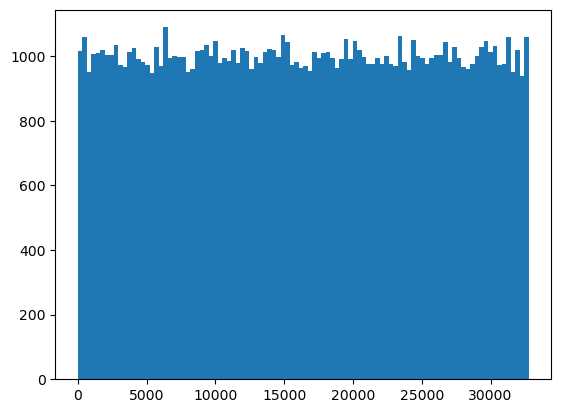

In [20]:
def RandB(k):
    liste=np.random.choice(['0', '1'], k-1)
    np.append(liste,1)
    binaire=''.join(liste)
    return int(binaire, 2)
y=[RandB(16) for i in range(100000)]
import matplotlib.pyplot as plt
plt.hist(y, bins=100)

La façon la plus simple de déterminer si un nombre $n$ est premier est d'essayer de le diviser par tous les nombres entiers $1 < d < n$. Il y a deux raisons qui permettent de ne pas tester tous les $d$ entre 2 et $n-1$. La première est qu'il est inutile d'essayer les $d$ pairs plus grands que 2. La seconde est qu'il est inutile de tester des nombres plus grands que $\sqrt{n}$.

b)
Écrivons un algorithme `isprime(n)` permettant de déterminer si un nombre est premier ou pas.
Par définition un nombre premier x a exactement 4 diviseurs distincts x, -x, 1 et -1: donc 0 et 1 ne sont pas premiers.

In [21]:
def isprime(n):
    if n==2:
        return True
    if n%2==0 or n==1 or n==0:
        return False
    for i in range(1,int(np.sqrt(n))//2+1):
        if n%(2*i+1)==0:
            return False
    return True

c)
Écrivons une fonction `generate(k,primality)` permettant de générer un nombre premier aléatoire de `k` bits avec le test de primalité `primality`. Testons avec le test de primalité `isprime`.

In [22]:
def generate(k, primality):
    essai=RandB(k)
    while not primality(essai):
        essai=RandB(k)
    return essai

generate(55, lambda x : isprime(x))

10641636745966453

Le programme prend deja 10 secondes pour k=55, alors n'imaginons pas avec k=1024... Il n'est pas raisonnable de pouvoir espérer générer un nombre premier de 1 024 bits avec cet algorithme.

4. Générer des nombres pseudo-premiers

L'algorithme précédent permettant de générer des nombres premiers étant inutilisable pour générer des grands nombres premiers, une autre approche, probabiliste, est à préconiser. Un test de primalité probabiliste décide qu'un nombre est premier s'il est premier avec une probabilité très grande. Un tel nombre est dit pseudo-premier. Ainsi un test probabiliste peut se tromper et supposer qu'un nombre est premier alors qu'en fait il ne l'est pas.

Le test de primalité le plus simple est fondé sur le petit théorème de Fermat: si $n$ est premier, alors $a^{n-1}=1 \pmod n$ pour tout $1 \leq a \leq n-1$. Ainsi si on trouve un $a$ tel que $a^{n-1}\neq1 \pmod n$, alors $n$ n'est pas premier. Le test de primalité de Fermat teste $N$ valeurs de $a$ choisies aléatoirement et si $a^{n-1}=1 \pmod n$ pour ces $N$ valeurs, alors il déclare que $n$ est probablement premier. Les nombres de Carmichael ne sont pas premiers, mais satisfont $a^{n-1}=1 \pmod n$ pour tout $a$ premier avec $n$. Les premiers nombres de Carmichael sont 561, 1 105 et 1 729. Si $n$ n'est pas un nombre de Carmichael, alors la probabilité que le test de Fermat se trompe est de $2^{-N}$. En choisissant par exemple $N=128$, on obtient une probabilité de se tromper inférieure à $3\times 10^{-39}$.

a)
Écrivons une fonction implémentant le test de primalité de Fermat. Utilisons ce test pour générer des nombres premiers aléatoires.

Note : 
Voir la documentation de la fonction `pow` pour une implémentation rapide. Si OpenSSL est installé sur votre ordinateur, il est facile de vérifier si un nombre est premier avec la commande `openssl prime 11` par exemple pour 11.

In [23]:
def PrimFermat(n):
    for _ in range(128):
        if (pow(np.random.randint(1,n), n-1)%n) != 1:
            return False
    return True

PrimFermat(2391101)

False

Cette version est très lente. Je pense qu'il faut implémenter une fonction qui tire partie du calcul modulaire pour accélerer le calcul de a^(n-1)%n. La fonction randint a l'air d'être aussi assez lente. 
Après quelques recherches, j'ai réalisé que python possède déja une fonction qui permet de faire ce que j'avais en tête : pow(a, e, n), qui combine les multiplications modulaires et l'exponentiation rapide.

In [24]:
def PrimFermat(n):
    for _ in range(128):
        if pow(np.random.randint(1, n), n-1, n) != 1:
            return False
    return True

generate(63, PrimFermat)

1325192244658258463

La fonction est beaucoup, beaucoup plus rapide ! Par contre a partir de k=64 python me renvoie un "high is out of bounds for int64". Pour cette raison, on va modifié la fonction en : 

In [29]:
import random

def PrimFermat_Corrigee(n):
    if n <= 1:
        return False
    for _ in range(128):
        a = random.randrange(1, n) 
        if pow(a, n - 1, n) != 1:
            return False
    return True

generate(120, PrimFermat_Corrigee)

82830785395754505038585942986486439

Cette fois, c'est extremement rapide et on peut gérer des nombres beaucoup plus grands.

b)
Améliorons la rapidité de l'algorithme précédent en testant d'abord si $n$ est divisible par les nombres premiers inférieurs à 1 000 avant d'appliquer le test de Fermat. J'utilise la bibliotèque sympy pour accéder a la fonction primerange(a,b) qui renvois tous les entiers premiers entre a et b, très utile!

In [30]:
import sympy as sp

def PrimFermat(n):
    for x in sp.primerange(0, 1000):
        if n%x == 0:
            return False
    for _ in range(128):
        if pow(np.random.randint(1, n), n-1, n) != 1:
            return False
    return True

print(PrimFermat(765))
print(PrimFermat(561))

False
False


c)
Implémenter la méthode Miller-Rabin expliquée en détails sur [Wikipédia](https://fr.wikipedia.org/wiki/Test_de_primalit%C3%A9_de_Miller-Rabin).
En fait l'article wikipedia donne une description en pseudo-language du test de Miller-Rabin, que nous traduisons ici en python: il y a dejà une première fonction qui determine si un nombre entre 1 et n peut servir de "témoin" pour prouver que n est composé : contrairement au test de fermat qui échoue lorsque n est un nombre de Carmichael, si a est un témoin de Miller, alors necessairement n est composé. Cela permet d'avoir une probabilité de primalité toujours très grande.
(attention, n est supposé impair en entré des fonctions suivantes)

In [120]:
import random

def TemoinMiller(n, a):
    if n == a:
        return False
        
    n_moins_1 = n - 1
    s = (n_moins_1 & -n_moins_1).bit_length() - 1 
    d = n_moins_1 >> s
    x = pow(a, d, n)
    
    if x == 1 or x == n_moins_1:
        return False 
    for _ in range(s - 1):
        x = pow(x, 2, n)
        if x == n_moins_1:
            return False 
    return True 
    
def PrimMillerRabin(n, iterations=40):
    if n <= 1 or n % 2 == 0: 
        return n == 2  
    for _ in range(iterations):
        a = random.randrange(2, n) 
        if TemoinMiller(n, a):
            return False
            
    return True


generate(1200, PrimMillerRabin)

938284881480816363283413920324348994306464325694521315128367686830608786261688832130123567717589264151555468408194480639750228007672371029112658580985153269399506263515980905551546029231169775185055171038715277432698484502023595507465805561629253067207536516381504179496584643841881334574308144881120657120031988592604093257081358602698316198217680673677654613

5. Chiffrement RSA

L'algorithme RSA, des initiales de Ronald Rivest, Adi Shamir et Leonard Adleman qui l'ont inventé en 1983, est un des algorithmes de cryptographie asymétrique les plus utilisés encore actuellement. Un chiffrement asymétrique permet de transmettre un message crypté à une personne A sans avoir eu auparavant besoin de transmettre une clef secrète à la personne B qui chiffre le message. La création par A d'une clef publique suffit à B pour chiffrer le message et pour que A puisse le déchiffrer avec sa clef privée. Il y a trois grandes étapes dans l'algorithme RSA:

**Création des clefs.**
La personne A voulant recevoir un message secret choisit deux très grands nombres premiers $p$ et $q$ qu'elle garde secrets. Elle calcule ensuite $n=pq$ et l'indicatrice d'Euler $\varphi(n)=(p-1)(q-1)$ qui compte le nombre d'entiers compris entre 1 et $n$ qui sont premiers avec $n$. Puis elle choisit un exposant de chiffrement $e$ qui est premier avec $\varphi(n)$. La clef publique de la personne A est donnée par le couple $(n,e)$. Finalement, la personne A calcule l'exposant de déchiffrement $d$ qui est l'inverse de $e$ modulo $\varphi(n)$, *i.e.* tel que $ed = 1 \pmod{\varphi(n)}$. La clef privée de A est $(p,q,d)$.

**Chiffrement du message.**
Pour chiffrer son message, la personne B le transforme tout d'abord en un nombre entier $M < n$. Le message chiffré est alors donné par:

$$
C = M^e \pmod n \,.
$$

**Déchiffrement du message.**
Le message chiffré $C$ est alors transmis à A. Pour le déchiffrer, A calcule:

$$
M = C^d \pmod n \,
$$

qui est à nouveau le message original.

**Remarque:**
Les nombres premiers $p$ et $q$ doivent être vraiment aléatoires, sinon il est possible de deviner leurs valeurs. Les nombres aléatoires générés par le module `random` le sont avec l'algorithme de Mersenne Twister. Cet algorithme n'est pas considéré comme cryptographiquement sûr dans le sens où une observation d'environ un millier de nombres générés aléatoirement par cet algorithme suffit à prédire toutes les itérations futures. Pour générer des nombres aléatoires cryptographiquement sûrs il faudrait utiliser le module [`secrets`](https://docs.python.org/fr/3/library/secrets.html).

a)

Commençons par substituer l'expression du chiffré $C$ dans la formule de déchiffrement :$$M \equiv (M^e)^d \pmod n$$$$M \equiv M^{ed} \pmod n \quad (*)$$

Par construction de l'algorithme RSA, l'exposant de déchiffrement $d$ est l'inverse modulaire de l'exposant de chiffrement $e$, modulo $\varphi(n)$. Cela signifie que :$$ed \equiv 1 \pmod{\varphi(n)}$$Cette relation implique qu'il existe un entier $k$ tel que :$$ed = 1 + k \cdot \varphi(n)$$ $(*)$

Substituons cette expression de $ed$ dans l'équation $(*)$ :$$M \equiv M^{1 + k \cdot \varphi(n)} \pmod n$$$$M \equiv M^1 \cdot M^{k \cdot \varphi(n)} \pmod n$$$$M \equiv M \cdot (M^{\varphi(n)})^k \pmod n$$

Le Théorème d'Euler stipule que pour tout entier $M$ premier avec $n$ (c'est-à-dire $\text{pgcd}(M, n) = 1$) :$$M^{\varphi(n)} \equiv 1 \pmod n$$En utilisant cette propriété dans l'équation précédente, on obtient :$$M \equiv M \cdot (1)^k \pmod n$$$$M \equiv M \cdot 1 \pmod n$$$$M \equiv M \pmod n$$
Conclusion : Le message déchiffré $M' = C^d \pmod n$ satisfait $M' \equiv M \pmod n$.

Donc le message déchiffré correspond bien au message original.

b)
À partir de $e$ et $\varphi(n)$ donnés, écrivons une fonction `bezout(e, phi)` permettant de déterminer $d$ tel que $ed = 1 \pmod{\varphi(n)}$.
Je me suis fortement inspiré de cette méthode : https://www.youtube.com/watch?v=BkK1_FspgYQ

In [121]:
def bezout(e, phi):
    L1=[e, 1, 0]
    L2=[-phi, 0, 1]
    while L2[0]!=0:
        q=L1[0]//L2[0]
        L=L2[:]
        for i in range(3):
            L2[i]=L1[i]-q*L2[i]
        L1=L
    return -L1[1]

d=bezout(368, 117)
print(d)
368*d%117

-55


1

c)
Écrivons un algorithme `generate_keys(length)` qui génère des nombres premiers $p$ et $q$ tels que $n$ ait `length` bits, puis détermine $\varphi(n)$, $e$ et $d$ et enfin retourne la clef publique $(n,e)$ et la clef privée $(p,q,d)$.
Il faut réécrire les fonctions generate et l'algorithme de Miller-Rabin en utilisant la génération d'entier entier avec le module secrets. 

Note : dans la fonction generate_key, j'ai choisi de prendre pour e un nombre premier quelconque, qui sera donc a posteriori premier avec phi(n).

In [127]:
import math
import random
import secrets

def pgcd_etendu(a, b):
    if a == 0:
        return b, 0, 1
    g, x1, y1 = pgcd_etendu(b % a, a) 
    x = y1 - (b // a) * x1
    y = x1
    
    return g, x, y
    
def inverse_modulaire(a, m):
    g, x, y = pgcd_etendu(a, m)
    if g != 1:
        raise Exception("L'inverse modulaire n'existe pas, a et m ne sont pas premiers entre eux.")
    return x % m
    
def generate(k, primality):
    essai=secrets.randbits(k)
    while not primality(essai):
        essai=secrets.randbits(k)
    return essai

def PrimMillerRabin(n, iterations=40):
    if n <= 1 or n % 2 == 0: 
        return n == 2  
    for _ in range(iterations):
        a = random.randrange(2, n) 
        if TemoinMiller(n, secrets.randbelow(n-2)+2):
            return False
            
    return True


def generate_keys(k_bits=100):
    p = generate(k_bits, PrimMillerRabin)
    q = generate(k_bits, PrimMillerRabin)
    while p == q:
        q = generate(k_bits, PrimMillerRabin)
    n = p * q
    phi_n = (p - 1) * (q - 1)
    e = 65537 
    while math.gcd(e, phi_n) != 1:
        e = random.randrange(2, phi_n) 
    d = inverse_modulaire(e, phi_n)
    return (n, e), (p, q, d)

generate_keys(16)

((3557924471, 65537), (62971, 56501, 397923473))

d)
En choisissant d'encoder chaque caractère sur 8 bits, une chaîne de caractères de longueur $\ell$ s'écrit comme une liste $(a_0,a_1,\dots a_\ell)$ avec chaque $0 \leq a_i \leq 255$. Cette liste peut être convertie en un entier $k$ de la façon suivante:
$$
k = \sum_{i=0}^\ell a_i 256^i
$$
Écrivons une fonction `toint` et une fonction `tostr` permettant respectivement de convertir une chaîne de caractères en cet entier et inversement.

In [128]:
import math

def toint(chaine):
    entier = 0
    for char in chaine:
        entier = (entier << 8) + ord(char)
    return entier

def tostr(entier, k):
    chaine = ""
    for _ in range(k):
        r = entier & 0xFF
        chaine = chr(r) + chaine
        entier = entier >> 8
    return chaine


def tostr_simple(entier):
    res = []
    while entier > 0:
        res.append(chr(entier & 0xFF))
        entier >>= 8
    return ''.join(reversed(res))

e)
Écrivons une fonction pour chiffrer un texte avec une clef publique et une autre permettant de le déchiffrer avec la clef privée. Pour cela il faut s'assurer que le texte soit convertible en un entier inférieur à $n$, sinon il faut le découper en blocs et les chiffrer séparément.

In [136]:
import math
    
def get_block_size(n):
    return (n.bit_length() + 7) // 8  


def chiffrer_texte(texte, e, n):
    k = get_block_size(n) 
    chiffre = []
    
    for i in range(0, len(texte), k):
        bloc_texte = texte[i : i + k]
        
        padding_needed = k - len(bloc_texte)
        if padding_needed > 0:
            bloc_texte_padde = bloc_texte + '\x00' * padding_needed
        else:
            bloc_texte_padde = bloc_texte
        
        M = toint(bloc_texte_padde)
        C = pow(M, e, n)
        chiffre.append(C)
    return chiffre

def dechiffrer_texte(chiffre, d, n):
    k = get_block_size(n)
    texte_clair = ""
    
    for C in chiffre:
        M = pow(C, d, n)
        bloc_texte = tostr(M, k)
        texte_clair += bloc_texte
    
    return texte_clair.rstrip('\x00')


k_bits = 10
(n, e), (p, q, d) = generate_keys(k_bits)
print(f"Clé Publique (n, e) : {n}, {e}")
print(f"Clé Privée (p, q, d) : {p}, {q}, {d}")


message = "ABC"

chiffre = chiffrer_texte(message, n, e)
print("\nMessage Chiffré (liste d'entiers) :")
print(chiffre)

message_dechiffre = dechiffrer_texte(chiffre, d, n)
print("\nMessage Déchiffré :")
print(message_dechiffre)

if message == message_dechiffre:
    print("\n✅ Succès : Le message déchiffré correspond au message original.")
else:
    print(f"\n❌ Échec : Le message original ({message}) ne correspond pas au message déchiffré ({message_dechiffre}).")

Clé Publique (n, e) : 487633, 65537
Clé Privée (p, q, d) : 569, 857, 179009

Message Chiffré (liste d'entiers) :
[47711]

Message Déchiffré :
Ü

❌ Échec : Le message original (ABC) ne correspond pas au message déchiffré (Ü).
